In [3]:
import random
import scipy
from scipy import stats
import matplotlib.pyplot as plot

import numpy as np
import pandas as pd

In [6]:
# Reading the waveform
data = pd.read_csv("waveform.csv", header=None)
no_of_traces = len(data.index)

## Testing of 1st byte

In [7]:
# Testing 1 byte
plaintext_bytes = []
data_arr = data[0].to_numpy()
for i in range(0,len(data_arr)):
    plaintext_bytes.append(int(data_arr[i][0:2],16))

In [98]:
data

,0,1,2,3,4,5,6,7,8,9,...,2493,2494,2495,2496,2497,2498,2499,2500,2501,2502
0,F9378C38C8E730B8215989AD87CCE983,3E7662CEF1F0498AD177DD58DDC647DB,0.454,0.414,0.402,0.424,0.386,0.346,0.392,0.454,...,0.398,0.354,0.320,0.402,0.378,0.338,0.386,0.350,0.318,NaN
1,48528FC241497F136DBF4A8827BA975D,8840331942AC28620C2BB9FB386CDCFB,0.440,0.444,0.406,0.436,0.396,0.350,0.400,0.416,...,0.412,0.360,0.330,0.372,0.384,0.358,0.368,0.354,0.312,NaN
2,417A9C9B7EB8577FEBA282B141BCB97F,DE1B901C0C8E3DB8683A9FA11E5243C2,0.478,0.432,0.408,0.414,0.378,0.356,0.420,0.452,...,0.380,0.332,0.330,0.388,0.360,0.332,0.372,0.344,0.312,NaN
3,4BF0E8D16CFFB8363A65A5E3DFBD08C1,BC98C24920EA3FEC04BD527780D066EA,0.468,0.428,0.408,0.412,0.380,0.340,0.400,0.460,...,0.380,0.352,0.318,0.382,0.376,0.334,0.374,0.346,0.314,NaN
4,5FFA6DEA5167807ACD82E2438828F17D,8DC77E851C9166B860A741C49F66406A,0.454,0.430,0.392,0.434,0.384,0.348,0.414,0.438,...,0.408,0.352,0.326,0.386,0.378,0.342,0.380,0.334,0.310,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2440878994785C659C308FCDDA61CACB,6E76FABD056B37CCD92611461AD20AB2,0.484,0.442,0.396,0.442,0.382,0.354,0.422,0.448,...,0.392,0.362,0.312,0.384,0.376,0.336,0.390,0.346,0.320,NaN
96,AAD9508325E32CBDA530C992BC18CEBA,9469C0C9F5C6FDA19667274A7D3A9CFC,0.448,0.436,0.394,0.426,0.384,0.344,0.406,0.458,...,0.396,0.348,0.326,0.378,0.374,0.340,0.376,0.338,0.310,NaN
97,06AFD969D32CFD4AC6C86AE5294B3BAD,5F652029260974C0B2FBF67107157BC4,0.482,0.436,0.408,0.422,0.388,0.358,0.424,0.446,...,0.400,0.346,0.322,0.378,0.358,0.334,0.378,0.334,0.308,NaN
98,FFD6E742109BD5B544AAA20E434C5DCF,78EB130C21DC2D712DECE99F03D3C4D6,0.464,0.418,0.392,0.410,0.376,0.336,0.392,0.458,...,0.390,0.354,0.324,0.384,0.360,0.346,0.374,0.336,0.320,NaN


In [8]:
def hw(int_no):
    count = 0
    for i in format(int_no, "08b"):
        if i == '1':
            count += 1
    
    return count

Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

In [9]:
no_of_possible_values_of_key_byte = 256
power_model_matrix = [[]]*no_of_possible_values_of_key_byte

In [10]:
for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    k = key_byte_guess
  
    leaky_sbox_output_value_array = []
  
    for byte in plaintext_bytes:
        byte_now = int(byte ^ k)
        leaky_sbox_output_value_array.append(Sbox[byte_now])
  
    hamming_weight_of_leaky_sbox_bytes = []
    for byte in range(0,no_of_traces):
        hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

    power_model_matrix[key_byte_guess] = hamming_weight_of_leaky_sbox_bytes

In [11]:
len(power_model_matrix)

256

In [99]:
actual_power_model_matrix = data.iloc[:,2:2502].to_numpy()
actual_power_model_matrix = np.transpose(actual_power_model_matrix[0:10])
no_of_power_trace = 2500
power_trace = actual_power_model_matrix[0]
power_trace

array([0.454, 0.44 , 0.478, 0.468, 0.454, 0.41 , 0.41 , 0.402, 0.416,
       0.476])

In [103]:
actual_power_model_matrix = data.iloc[:,2:2502].to_numpy()
actual_power_model_matrix = np.transpose(actual_power_model_matrix)
no_of_power_trace = 2500
power_trace = actual_power_model_matrix[0]
model_trace = power_model_matrix[0]
len(model_trace)

100

In [104]:
correlation_matrix = []
for key_byte_guess in range(0, no_of_possible_values_of_key_byte):
    correlation_values = []
    model_trace = power_model_matrix[key_byte_guess]
    for i in range(0,no_of_power_trace):
        power_trace = actual_power_model_matrix[i]
        corr_value = scipy.stats.pearsonr(power_trace, model_trace)
        correlation_values.append(corr_value[0])
    correlation_matrix.append(correlation_values)

In [183]:
correlation_df = pd.DataFrame(data=correlation_matrix)
correlation_df

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.034907,-0.045857,-0.070371,-0.095893,-0.027597,0.012813,-0.015622,-0.073164,-0.052907,-0.080450,...,-0.032823,-0.009417,-0.096938,0.083079,-0.031100,0.044558,-0.061146,0.012617,-0.022450,-0.014250
1,0.019734,0.110638,-0.057367,0.002370,0.027258,-0.016660,-0.013196,-0.068232,-0.043167,-0.119003,...,-0.029410,-0.057292,-0.035912,-0.076887,-0.150155,0.117861,0.097247,-0.008068,0.009598,-0.106199
2,0.127776,-0.086647,0.061299,0.009074,0.002003,0.000526,-0.010081,0.067494,0.040010,0.129994,...,0.023970,-0.057299,-0.018866,-0.064889,0.071989,-0.063576,0.017464,0.011468,0.003004,0.080415
3,-0.118618,-0.118308,-0.045976,-0.287870,-0.106697,-0.089500,-0.085330,-0.227450,-0.137485,-0.209628,...,0.139364,-0.144587,-0.108310,0.165127,-0.075838,0.002102,0.003024,-0.213798,-0.083468,-0.066792
4,0.103623,-0.107158,-0.056075,-0.113967,-0.117314,0.107803,0.115678,0.078694,-0.162977,0.031231,...,0.023942,-0.150444,-0.169795,-0.029160,0.114277,-0.196062,-0.134538,0.073016,-0.172956,-0.043528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.056951,0.113585,0.026242,0.080880,0.078238,-0.040454,0.041306,0.071907,0.036922,0.043102,...,-0.101602,-0.119084,-0.031263,-0.036838,0.076925,0.041629,-0.128652,0.033898,0.016385,-0.021348
252,0.212153,-0.093475,-0.008612,0.067986,-0.046825,0.040887,0.145332,0.161507,-0.032513,0.196607,...,-0.071463,-0.012250,0.001572,0.001618,0.294248,-0.008549,-0.075924,0.171664,-0.069404,-0.145374
253,0.076697,0.020410,-0.118795,0.216528,0.099058,-0.143677,0.009504,0.103666,0.025799,0.144757,...,-0.261423,0.160832,0.149897,-0.252131,0.024136,0.042747,-0.040088,0.070557,0.051829,-0.074223
254,-0.024838,0.000370,0.032186,0.108215,0.008399,-0.125763,-0.024433,0.034104,0.080479,-0.015245,...,-0.086978,0.047769,0.073037,-0.018189,-0.076995,0.041986,0.037010,0.045748,0.025727,0.010637


In [36]:
x,y = np.where(correlation_matrix == np.amax(correlation_matrix))
x[0]
x = np.where(correlation_matrix[65] == np.amax(correlation_matrix[65]))
x[0][0]
#correlation_matrix[0][x[0][0]]

513

In [203]:
corrs = np.array(correlation_matrix).sum(axis=0)
corr_order = corrs.argsort()[::-1]
hex(corr_order[0])

'0x87'

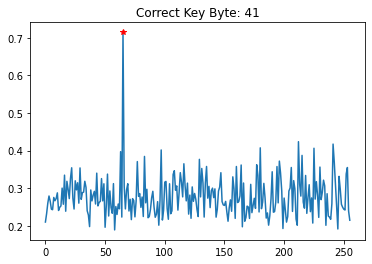

In [73]:
(x1,y1) = np.where(correlation_matrix == np.amax(correlation_matrix))

best_correlation_values = []
x_index = []
for i in range(0, no_of_possible_values_of_key_byte):
    x_index.append(i)
    x = np.where(correlation_matrix[i] == np.amax(correlation_matrix[i]))
    #best_correlation_values.append(correlation_matrix[i][513])
    best_correlation_values.append(correlation_matrix[i][x[0][0]])

sorting_order = np.argsort(best_correlation_values)
sorting_order = sorting_order[::-1]

best_pos = np.where(best_correlation_values == correlation_matrix[x1[0]][y1[0]])
#best_correlation_values[best_pos[0][0]]
#x_index = np.transpose(x_index)

plot.figure()
plot.title("Correct Key Byte: {}".format(sorting_order[0]))
plot.plot(x_index, best_correlation_values)
plot.plot(x1[0], best_correlation_values[best_pos[0][0]],'r*')
plot.show()

#hex(sorting_order[0])

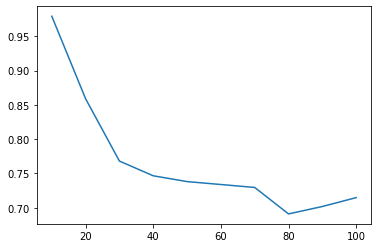

In [106]:
no_of_possible_values_of_key_byte = 256
power_model_matrix = [[]]*no_of_possible_values_of_key_byte

#actual_power_model_matrix = data.iloc[:,2:2502].to_numpy()
#actual_power_model_matrix = np.transpose(actual_power_model_matrix)
no_of_power_trace = 2500

best_correlation_values = []
x_index = []
for i in range(10, no_of_traces+10, 10):
    x_index.append(i)
    actual_power_model_matrix = data.iloc[:,2:2502].to_numpy()
    actual_power_model_matrix = np.transpose(actual_power_model_matrix[0:i])
    
    for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
        k = key_byte_guess
  
        leaky_sbox_output_value_array = []

        for byte in plaintext_bytes:
            byte_now = int(byte ^ k)
            leaky_sbox_output_value_array.append(Sbox[byte_now])

        hamming_weight_of_leaky_sbox_bytes = []
        for byte in range(0,i):
            hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

        power_model_matrix[key_byte_guess] = hamming_weight_of_leaky_sbox_bytes
    
    correlation_matrix = []
    for key_byte_guess in range(0, no_of_possible_values_of_key_byte):
        correlation_values = []
        model_trace = power_model_matrix[key_byte_guess]
        for i in range(0,no_of_power_trace):
            power_trace = actual_power_model_matrix[i]
            corr_value = scipy.stats.pearsonr(power_trace, model_trace)
            correlation_values.append(corr_value[0])
        correlation_matrix.append(correlation_values)
    
    x,y = np.where(correlation_matrix == np.amax(correlation_matrix))
    best_correlation_values.append(correlation_matrix[x[0]][y[0]])

plot.figure()
#plot.title("Correct Key Byte: {}".format(int(hex(sorting_order[0])[2:])))
plot.plot(x_index, best_correlation_values)
#plot.plot(x1[0], best_correlation_values[best_pos[0][0]],'r*')
plot.show()

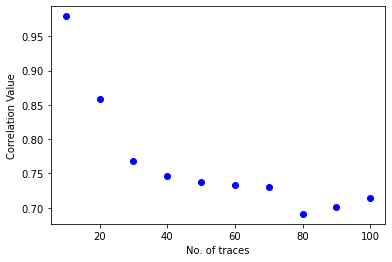

In [108]:
plot.figure()
#plot.title("Correct Key Byte: {}".format(int(hex(sorting_order[0])[2:])))
plot.xlabel('No. of traces')
plot.ylabel('Correlation Value')
plot.plot(x_index, best_correlation_values, 'ob')
#plot.plot(x1[0], best_correlation_values[best_pos[0][0]],'r*')
plot.show()

In [222]:
print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))
print("Correct Key Byte: {}".format(int(hex(sorting_order[0])[2:])))

No. of Traces: 100
Correct Key Byte: 41


## The Full Method of Extracting Key (16 times)

In [109]:
def hw(int_no):
    count = 0
    for i in format(int_no, "08b"):
        if i == '1':
            count += 1
    
    return count

Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

def getFullKey(file_csv = 'waveform.csv',
               actual_key_byte = 16,
               no_of_possible_values_of_key_byte = 256,
               no_of_power_trace = 2500,
               no_of_traces = 100):
    
    data = pd.read_csv(file_csv, header=None)
    data_arr = data[0].to_numpy()
    
    power_model_matrix = [[]]*no_of_possible_values_of_key_byte
    actual_power_model_matrix = data.iloc[:,2:2502].to_numpy()
    actual_power_model_matrix = np.transpose(actual_power_model_matrix)
    
    
    actual_key = []
    for cycle in range(0, actual_key_byte*2, 2):
        plaintext_bytes = []
        for i in range(0,len(data_arr)):
            plaintext_bytes.append(int(data_arr[i][cycle:cycle+2],16))
            
        for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
            k = key_byte_guess

            leaky_sbox_output_value_array = []

            for byte in plaintext_bytes:
                byte_now = int(byte ^ k)
                leaky_sbox_output_value_array.append(Sbox[byte_now])

            hamming_weight_of_leaky_sbox_bytes = []
            for byte in range(0,no_of_traces):
                hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

            power_model_matrix[key_byte_guess] = hamming_weight_of_leaky_sbox_bytes

        correlation_matrix = []
        for key_byte_guess in range(0, no_of_possible_values_of_key_byte):
            correlation_values = []
            model_trace = power_model_matrix[key_byte_guess]
            for i in range(0,no_of_power_trace):
                power_trace = actual_power_model_matrix[i]
                corr_value = scipy.stats.pearsonr(power_trace, model_trace)
                correlation_values.append(corr_value[0])
            correlation_matrix.append(correlation_values)

        (x1,y1) = np.where(correlation_matrix == np.amax(correlation_matrix))

        best_correlation_values = []
        x_index = []
        for i in range(0, no_of_possible_values_of_key_byte):
            x_index.append(i)
            x = np.where(correlation_matrix[i] == np.amax(correlation_matrix[i]))
            best_correlation_values.append(correlation_matrix[i][x[0][0]])
            #best_correlation_values.append(correlation_matrix[i][y[0]])

        sorting_order = np.argsort(best_correlation_values)
        sorting_order = sorting_order[::-1]
        actual_key.append(sorting_order[0])
        
        best_pos = np.where(best_correlation_values == correlation_matrix[x1[0]][y1[0]])
        plot.figure()
        plot.title("Correct Key Byte: {}".format(sorting_order[0]))
        plot.xlabel('Value of key byte')
        plot.ylabel('Correlation Value')
        plot.plot(x_index, best_correlation_values)
        plot.plot(x1[0], best_correlation_values[best_pos[0][0]],'r*')
        plot.show()
        
        print("Correct Key Byte: {}".format(int(hex(sorting_order[0])[2:])))
    
    print("Correct Key: ")
    for i in len(0, actual_key):
        print("{} ".format(hex(actual_key)[2:]))
        
    return correlation_matrix    

In [111]:
correlation_100 = getFullKey(no_of_traces = 100)

KeyboardInterrupt: 